## 데이터 로드

In [1]:
import polars as pl

train = pl.read_parquet("../input/toss-next-challenge/train.parquet")

print(train.shape)
train.head()

(10704179, 119)


gender,age_group,inventory_id,day_of_week,hour,seq,l_feat_1,l_feat_2,l_feat_3,l_feat_4,l_feat_5,l_feat_6,l_feat_7,l_feat_8,l_feat_9,l_feat_10,l_feat_11,l_feat_12,l_feat_13,l_feat_14,l_feat_15,l_feat_16,l_feat_17,l_feat_18,l_feat_19,l_feat_20,l_feat_21,l_feat_22,l_feat_23,l_feat_24,l_feat_25,l_feat_26,l_feat_27,feat_e_1,feat_e_2,feat_e_3,feat_e_4,…,history_a_2,history_a_3,history_a_4,history_a_5,history_a_6,history_a_7,history_b_1,history_b_2,history_b_3,history_b_4,history_b_5,history_b_6,history_b_7,history_b_8,history_b_9,history_b_10,history_b_11,history_b_12,history_b_13,history_b_14,history_b_15,history_b_16,history_b_17,history_b_18,history_b_19,history_b_20,history_b_21,history_b_22,history_b_23,history_b_24,history_b_25,history_b_26,history_b_27,history_b_28,history_b_29,history_b_30,clicked
str,str,str,str,str,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i32
"""1.0""","""7.0""","""36""","""5""","""13""","""9,18,269,516,57,97,527,74,317,…",1.0,2.0,1.0,23.0,1.0,1.0,193.0,2.0,50.0,118.0,743.0,2877.0,2.0,1591.0,1058.0,2.0,50.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1129.0,5.0,2.0,65.0,-4230.666504,23.863636,-0.05,…,-0.055556,0.02439,-326.857147,-0.014493,-183.285721,-13.596154,0.115821,0.138626,0.047507,0.050622,0.026479,0.001558,0.024922,0.051401,0.004673,0.021028,0.072428,0.007009,0.028816,0.05841,0.000779,0.072428,0.016355,0.011682,0.010124,0.002336,0.008567,0.070092,0.070092,0.011682,0.004673,0.087226,0.049843,0.015576,0.040498,0.051401,0
"""1.0""","""7.0""","""2""","""5""","""08""","""9,144,269,57,516,97,527,74,315…",2.0,2.0,3.0,17.0,193.0,116.0,164.0,2.0,14.0,109.0,674.0,218.0,2.0,122.0,751.0,1.0,14.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1129.0,16.0,1.0,65.0,-1346.648193,4.545455,-0.05,…,0.0,0.0,-382.285706,0.0,-176.0,-11.442307,0.068794,0.072179,0.049471,0.052715,0.027574,0.001622,0.025952,0.053526,0.004866,0.021897,0.075423,0.007299,0.030007,0.060825,0.000811,0.075423,0.017031,0.012165,0.010543,0.002433,0.008921,0.07299,0.07299,0.012165,0.004866,0.045416,0.051904,0.01622,0.042172,0.026763,0
"""1.0""","""7.0""","""36""","""5""","""11""","""269,516,57,97,165,527,74,77,31…",1.0,2.0,1.0,7.0,675.0,85.0,227.0,2.0,362.0,212.0,1029.0,3916.0,1.0,2924.0,2304.0,2.0,362.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1129.0,16.0,1.0,64.638885,-3195.388916,22.727272,-0.05,…,-0.111111,0.097561,-409.0,-0.014493,-224.714279,-13.942307,0.112947,0.169634,0.038753,0.041295,0.0216,0.001271,0.02033,0.04193,0.003812,0.017153,0.059083,0.005718,0.023506,0.047647,0.000635,0.059083,0.026683,0.00953,0.008259,0.001906,0.006988,0.057177,0.057177,0.00953,0.003812,0.035577,0.081318,0.012706,0.033036,0.062898,0
"""1.0""","""8.0""","""37""","""5""","""11""","""269,57,516,21,214,269,561,214,…",2.0,2.0,2.0,7.0,294.0,442.0,130.0,2.0,163.0,179.0,102.0,789.0,2.0,2169.0,439.0,1.0,163.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1129.0,4.0,1.0,65.0,-4029.962891,3.863636,-0.05,…,-0.055556,0.02439,-274.428558,-0.014493,-127.85714,-9.846154,0.159843,0.198657,0.068082,0.072546,0.037947,0.002232,0.035715,0.073663,0.006697,0.030135,0.103797,0.010045,0.041296,0.083707,0.002232,0.103797,0.023438,0.016741,0.014509,0.003348,0.012277,0.100449,0.100449,0.016741,0.006697,0.062502,0.07143,0.022322,0.058037,0.073659,0
"""2.0""","""7.0""","""37""","""5""","""07""","""144,269,57,516,35,479,57,516,5…",2.0,2.0,3.0,24.0,497.0,435.0,171.0,2.0,193.0,131.0,690.0,110.0,1.0,2084.0,106.0,1.0,193.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1129.0,15.0,4.0,65.0,-2106.407471,8.522727,-0.05,…,0.0,0.0,-407.571442,0.0,-199.142853,-14.019231,0.056166,0.063795,0.043725,0.046592,0.024371,0.001434,0.022938,0.047309,0.004301,0.019354,0.066662,0.006451,0.026522,0.05376,0.000717,0.066662,0.015053,0.010752,0.009318,0.00215,0.007885,0.064512,0.064512,0.010752,0.004301,0.040141,0.045875,0.014336,0.037274,0.023654,0


In [4]:
train.columns

['gender',
 'age_group',
 'inventory_id',
 'day_of_week',
 'hour',
 'seq',
 'l_feat_1',
 'l_feat_2',
 'l_feat_3',
 'l_feat_4',
 'l_feat_5',
 'l_feat_6',
 'l_feat_7',
 'l_feat_8',
 'l_feat_9',
 'l_feat_10',
 'l_feat_11',
 'l_feat_12',
 'l_feat_13',
 'l_feat_14',
 'l_feat_15',
 'l_feat_16',
 'l_feat_17',
 'l_feat_18',
 'l_feat_19',
 'l_feat_20',
 'l_feat_21',
 'l_feat_22',
 'l_feat_23',
 'l_feat_24',
 'l_feat_25',
 'l_feat_26',
 'l_feat_27',
 'feat_e_1',
 'feat_e_2',
 'feat_e_3',
 'feat_e_4',
 'feat_e_5',
 'feat_e_6',
 'feat_e_7',
 'feat_e_8',
 'feat_e_9',
 'feat_e_10',
 'feat_d_1',
 'feat_d_2',
 'feat_d_3',
 'feat_d_4',
 'feat_d_5',
 'feat_d_6',
 'feat_c_1',
 'feat_c_2',
 'feat_c_3',
 'feat_c_4',
 'feat_c_5',
 'feat_c_6',
 'feat_c_7',
 'feat_c_8',
 'feat_b_1',
 'feat_b_2',
 'feat_b_3',
 'feat_b_4',
 'feat_b_5',
 'feat_b_6',
 'feat_a_1',
 'feat_a_2',
 'feat_a_3',
 'feat_a_4',
 'feat_a_5',
 'feat_a_6',
 'feat_a_7',
 'feat_a_8',
 'feat_a_9',
 'feat_a_10',
 'feat_a_11',
 'feat_a_12',
 'feat

통계적 중요도가 높더라도 모델의 일반화 성능을 해칠 수 있는 특성들

## ID 피처를 찾는 이유 
- 단순 식별를 위한 피처의 경우 예측력이 아닌 말 그대로 식별 용도 
- ID 피처의 경우 Train 데이터에 있는 ID가 Test 데이터에 없을 확률이 높음, 그럼 모델이 예측 불가능

### ID 피처 찾기
- toss 측에서 l_feat_14 (광고세트 ID) 라고 알려줌
- 추가로  l_feat_* 내에 ID 피처가 있을 것으로 보고 eda를 진행함

#### 기본 광고 구조로 보았을 때 campaign과 광고소재 id가 있을 것으로 봄
- 캠페인 (Campaign): 광고 캠페인 단위
- 광고세트 (Ad Set): 캠페인 내 세부 설정 단위 (l_feat_14가 광고세트 ID)
- 광고소재 (Ad): 실제 광고 콘텐츠 단위

![](https://toss-ads.gitbook.io/guide/~gitbook/image?url=https%3A%2F%2F1103230780-files.gitbook.io%2F%7E%2Ffiles%2Fv0%2Fb%2Fgitbook-x-prod.appspot.com%2Fo%2Fspaces%252F6C6VnjnrKC0ixISOKw0d%252Fuploads%252FlKEPFQea3o06zaDsHRnw%252F%25E1%2584%2590%25E1%2585%25A9%25E1%2584%2589%25E1%2585%25B3%25E1%2584%258B%25E1%2585%25A2%25E1%2584%258C%25E1%2585%25B3.png%3Falt%3Dmedia%26token%3Da87ff10d-12b0-44e7-9389-4205e7f9de9f&width=768&dpr=1&quality=100&sign=c21e7417&sv=2)

- 광고 매체별로 광고 구조별 최댓값이 있다. Toss의 경우 캠페인당 광고세트 100개, 광고세트당 소재 100개 까지 생성 가능 - [참조](https://toss-ads.gitbook.io/guide/ad/banner/creative#:~:text=%EC%BA%A0%ED%8E%98%EC%9D%B8%EB%8B%B9%20%EA%B4%91%EA%B3%A0%EC%84%B8%ED%8A%B8%20100%EA%B0%9C%2C%20%EA%B4%91%EA%B3%A0%EC%84%B8%ED%8A%B8%EB%8B%B9%20%EC%86%8C%EC%9E%AC%20100%EA%B0%9C%20%EA%B9%8C%EC%A7%80%20%EC%83%9D%EC%84%B1%20%EA%B0%80%EB%8A%A5%ED%95%B4%EC%9A%94)
  - 후보 피처 유니크한 값들이 캠페인 id라면 각 캠페인 id 당 `l_feat_14`의 유니크한 값이 100개를 초과해서는 안됨
  - `l_feat_14`의 유니크한 값들이 광고 세트 id이고 각 광고 세트 id 당 광고소재 후보 피처의 유니크한 값이 100개를 초과해서는 안됨

In [2]:
# 1. 광고세트 ID (l_feat_14) 확인 및 캠페인 ID 찾기
print("=== 광고세트 ID (l_feat_14) 분석 ===")
print(f"l_feat_14 유니크 값 개수: {train['l_feat_14'].n_unique()}")
print(f"l_feat_14 값 범위: {train['l_feat_14'].min()} ~ {train['l_feat_14'].max()}")
print(f"l_feat_14 null 값 개수: {train['l_feat_14'].null_count()}")

# l_feat_14의 분포 확인
print("\nl_feat_14 값 분포 (상위 10개):")
print(train['l_feat_14'].value_counts().head(10))


=== 광고세트 ID (l_feat_14) 분석 ===
l_feat_14 유니크 값 개수: 3237
l_feat_14 값 범위: 1.0 ~ 3245.0
l_feat_14 null 값 개수: 0

l_feat_14 값 분포 (상위 10개):
shape: (10, 2)
┌───────────┬───────┐
│ l_feat_14 ┆ count │
│ ---       ┆ ---   │
│ f32       ┆ u32   │
╞═══════════╪═══════╡
│ 682.0     ┆ 4999  │
│ 588.0     ┆ 47    │
│ 741.0     ┆ 99    │
│ 286.0     ┆ 56    │
│ 2652.0    ┆ 19    │
│ 2922.0    ┆ 23540 │
│ 2894.0    ┆ 23    │
│ 1645.0    ┆ 69    │
│ 1009.0    ┆ 56    │
│ 2767.0    ┆ 5     │
└───────────┴───────┘


### 1. 캠페인 ID 후보 찾기 - l_feat 컬럼들 중에서 광고세트보다 상위 계층일 것 같은 것들
- 광고 set 상위 개념은 캠페인이기에 광고 set 피처인 l_feat_14의 유니크 수보다 작은 유니크 수 필요

In [3]:
print("=== 캠페인 ID 후보 분석 ===")

# l_feat 컬럼들의 유니크 값 개수 비교
l_feat_cols = [col for col in train.columns if col.startswith('l_feat_')]
campaign_candidates = []

for col in l_feat_cols:
    unique_count = train[col].n_unique()
    null_count = train[col].null_count()
    
    # 광고세트보다 유니크 값이 적고, null이 적은 컬럼들을 후보로
    if unique_count < train['l_feat_14'].n_unique()  and null_count <= train['l_feat_14'].null_count():
        campaign_candidates.append((col, unique_count, null_count))

print(train['l_feat_14'].n_unique())
print("캠페인 ID 후보들 (광고세트보다 유니크 값이 적은 컬럼들):")
for col, unique_count, null_count in sorted(campaign_candidates, key=lambda x: x[1]):
    print(f"{col}: {unique_count}개 유니크 값, {null_count}개 null")


=== 캠페인 ID 후보 분석 ===
3237
캠페인 ID 후보들 (광고세트보다 유니크 값이 적은 컬럼들):
l_feat_1: 2개 유니크 값, 0개 null
l_feat_13: 2개 유니크 값, 0개 null
l_feat_16: 2개 유니크 값, 0개 null
l_feat_3: 3개 유니크 값, 0개 null
l_feat_27: 5개 유니크 값, 0개 null
l_feat_26: 18개 유니크 값, 0개 null
l_feat_4: 26개 유니크 값, 0개 null
l_feat_10: 262개 유니크 값, 0개 null
l_feat_7: 313개 유니크 값, 0개 null
l_feat_9: 476개 유니크 값, 0개 null
l_feat_17: 476개 유니크 값, 0개 null
l_feat_6: 900개 유니크 값, 0개 null
l_feat_5: 1076개 유니크 값, 0개 null
l_feat_11: 1524개 유니크 값, 0개 null
l_feat_25: 1788개 유니크 값, 0개 null
l_feat_15: 2582개 유니크 값, 0개 null


유니크 값이 30개 이하는 범주형으로 판단하고 그 이상인 피처들 중에서

In [12]:
# 유니크 값이 l_feat_14의 유니크 값보단 작고 30개 보다는 많은 피처들
additional_candidates = [(col, unique_count, null_count) for col, unique_count, null_count in campaign_candidates if unique_count > 30]

best_additional_candidates = []

print("후보명        유니크  null     최대광고세트  평균광고세트  100개제한  타겟수  지면수  종합점수")
print("-" * 85)

for col, unique_count, null_count in additional_candidates:
    # 광고세트 수 분석
    col_to_adset = train.group_by(col).agg([
        pl.col('l_feat_14').n_unique().alias('adset_count'),
        pl.len().alias('total_records')
    ]).sort('adset_count', descending=True)
    
    max_adset = col_to_adset['adset_count'].max()
    avg_adset = col_to_adset['adset_count'].mean()
    
    # 100개 제한 확인
    over_100 = col_to_adset.filter(pl.col('adset_count') > 100).height
    within_limit = "✅" if over_100 == 0 else f"❌({over_100}개 초과)"
    
    # 타겟 정보 분석 (gender, age_group)
    target_analysis = train.group_by(col).agg([
        pl.col('gender').n_unique().alias('gender_count'),
        pl.col('age_group').n_unique().alias('age_group_count')
    ]).sort('gender_count', descending=True)
    
    max_gender = target_analysis['gender_count'].max()
    max_age = target_analysis['age_group_count'].max()
    target_diversity = max_gender * max_age
    
    # 지면 정보 분석 (inventory_id)
    inventory_analysis = train.group_by(col).agg([
        pl.col('inventory_id').n_unique().alias('inventory_count')
    ]).sort('inventory_count', descending=True)
    
    max_inventory = inventory_analysis['inventory_count'].max()
    
    # 종합 점수 계산
    import math
    adset_score = math.log10(max_adset) if max_adset > 0 else 0
    target_score = target_diversity
    inventory_score = max_inventory
    total_score = adset_score + target_score + inventory_score
    
    best_additional_candidates.append((col, unique_count, null_count, max_adset, target_diversity, max_inventory, total_score, over_100))
    
    print(f"{col:12s} {unique_count:6,} {null_count:8,} {max_adset:10,} {avg_adset:10.1f} {within_limit:8s} {max_gender:6,} {max_inventory:6,} {total_score:8.1f}")

print("\n=== 100개 제한을 만족하는 후보들 ===")
valid_candidates = [c for c in best_additional_candidates if c[7] == 0]
if valid_candidates:
    for col, unique_count, null_count, max_adset, target_diversity, max_inventory, total_score, over_100 in valid_candidates:
        print(f"✅ {col}: 최대 {max_adset}개 광고세트, {total_score:.1f}점")
else:
    print("❌ 100개 제한을 만족하는 후보 없음")

print("\n=== 종합 점수 순위 (추가 후보들) ===")
valid_candidates.sort(key=lambda x: x[6], reverse=True)
for i, (col, unique_count, null_count, max_adset, target_diversity, max_inventory, total_score, over_100) in enumerate(valid_candidates, 1):
    print(f"{i:2d}. {col:12s}: {total_score:6.1f}점 (광고세트: {max_adset:,}, 타겟: {target_diversity}, 지면: {max_inventory})")


후보명        유니크  null     최대광고세트  평균광고세트  100개제한  타겟수  지면수  종합점수
-------------------------------------------------------------------------------------
l_feat_5      1,076        0      2,302        3.9 ❌(2개 초과)      3     18     48.4
l_feat_6        900        0      2,291        4.5 ❌(2개 초과)      3     18     48.4
l_feat_7        313        0      1,420       10.6 ❌(2개 초과)      3     18     48.2
l_feat_9        476        0        500        6.8 ❌(3개 초과)      3     18     44.7
l_feat_10       262        0      2,392       12.4 ❌(1개 초과)      3     18     48.4
l_feat_11     1,524        0        100        3.3 ✅             3     18     44.0
l_feat_15     2,582        0          8        1.3 ✅             3     18     42.9
l_feat_17       476        0        500        6.8 ❌(3개 초과)      3     18     44.7
l_feat_25     1,788        0      3,235       45.1 ❌(237개 초과)      3     18     48.5

=== 100개 제한을 만족하는 후보들 ===
✅ l_feat_11: 최대 100개 광고세트, 44.0점
✅ l_feat_15: 최대 8개 광고세트, 42.9점

=== 종합 점수

-> l_feat_11 를 캠페인 id 피처로 잠정 

In [13]:
# 광고 소재 ID 찾기
print("=== 광고 소재 ID 후보 분석 ===")

# 광고 세트 ID (l_feat_14)의 유니크 값 개수
adset_unique_count = train['l_feat_14'].n_unique()
print(f"광고 세트 ID (l_feat_14) 유니크 값 개수: {adset_unique_count:,}")

# 광고 소재 ID 후보 찾기 - 광고 세트보다 유니크 값이 많거나 같은 컬럼들
ad_candidates = []

for col in train.columns:
    if col == 'l_feat_14' or col == 'clicked':  # 광고 세트 ID와 타겟 변수 제외
        continue
        
    unique_count = train[col].n_unique()
    null_count = train[col].null_count()
    
    # 광고 세트보다 유니크 값이 많거나 같고, null이 적은 컬럼들을 후보로
    if unique_count >= adset_unique_count and null_count <= train['l_feat_14'].null_count():
        ad_candidates.append((col, unique_count, null_count))

print(f"\n광고 소재 ID 후보들 (광고 세트보다 유니크 값이 많거나 같은 컬럼들):")
print("후보명        유니크  null     광고세트비율")
print("-" * 50)

for col, unique_count, null_count in sorted(ad_candidates, key=lambda x: x[1]):
    ratio = unique_count / adset_unique_count
    print(f"{col:12s} {unique_count:6,} {null_count:8,} {ratio:8.2f}x")


=== 광고 소재 ID 후보 분석 ===
광고 세트 ID (l_feat_14) 유니크 값 개수: 3,237

광고 소재 ID 후보들 (광고 세트보다 유니크 값이 많거나 같은 컬럼들):
후보명        유니크  null     광고세트비율
--------------------------------------------------
l_feat_12     5,050        0     1.56x
seq          7,179,942        0  2218.09x


In [15]:
# 광고 소재 ID 후보들의 상세 분석
print("=== 광고 소재 ID 후보 상세 분석 ===")

# 상위 후보들에 대해 더 자세한 분석
top_candidates = [c for c in ad_candidates if c[1] <= adset_unique_count * 10][:10]  # 광고세트의 10배 이하인 후보들

print("상위 후보들 (광고세트의 10배 이하):")
print("후보명        유니크  null     광고세트비율  광고세트당평균")
print("-" * 60)

for col, unique_count, null_count in top_candidates:
    ratio = unique_count / adset_unique_count
    avg_per_adset = unique_count / adset_unique_count
    print(f"{col:12s} {unique_count:6,} {null_count:8,} {ratio:8.2f}x {avg_per_adset:10.1f}")

# 각 후보에 대해 광고세트와의 관계 분석
print(f"\n=== 광고세트-광고소재 관계 분석 ===")

for col, unique_count, null_count in top_candidates[:5]:  # 상위 5개만 분석
    print(f"\n--- {col} 분석 ---")
    
    # 광고세트별 광고소재 수 분석
    adset_to_ad = train.group_by('l_feat_14').agg([
        pl.col(col).n_unique().alias('ad_count'),
        pl.len().alias('total_records')
    ]).sort('ad_count', descending=True)
    
    max_ads_per_adset = adset_to_ad['ad_count'].max()
    avg_ads_per_adset = adset_to_ad['ad_count'].mean()
    min_ads_per_adset = adset_to_ad['ad_count'].min()
    
    print(f"  광고세트당 광고소재 수:")
    print(f"    - 최대: {max_ads_per_adset}개")
    print(f"    - 평균: {avg_ads_per_adset:.1f}개")
    print(f"    - 최소: {min_ads_per_adset}개")
    
    # 100개 제한 확인
    over_100 = adset_to_ad.filter(pl.col('ad_count') > 100).height
    if over_100 == 0:
        print(f"  ✅ 100개 제한 만족 (초과: {over_100}개) \n")
    else:
        print(f"  ❌ 100개 제한 위반 (초과: {over_100}개)\n")
    
    # 광고소재별 광고세트 수 (1:1 관계 확인)
    ad_to_adset = train.group_by(col).agg([
        pl.col('l_feat_14').n_unique().alias('adset_count')
    ]).sort('adset_count', descending=True)
    
    max_adsets_per_ad = ad_to_adset['adset_count'].max()
    avg_adsets_per_ad = ad_to_adset['adset_count'].mean()
    
    print(f"  광고소재당 광고세트 수:")
    print(f"    - 최대: {max_adsets_per_ad}개")
    print(f"    - 평균: {avg_adsets_per_ad:.1f}개")
    
    if max_adsets_per_ad == 1:
        print(f"  ✅ 1:1 관계 확인 (광고소재 ID 가능성 높음)\n")
    else:
        print(f"  ❌ 1:N 관계 (광고소재 ID 가능성 낮음)\n")
    
    # 상위 10개 광고세트의 광고소재 분포
    print(f"  상위 10개 광고세트의 광고소재 분포:")
    for row in adset_to_ad.head(10).iter_rows():
        print(f"    광고세트 {row[0]} -> {row[1]}개 광고소재 ({row[2]:,}개 레코드)")


=== 광고 소재 ID 후보 상세 분석 ===
상위 후보들 (광고세트의 10배 이하):
후보명        유니크  null     광고세트비율  광고세트당평균
------------------------------------------------------------
l_feat_12     5,050        0     1.56x        1.6

=== 광고세트-광고소재 관계 분석 ===

--- l_feat_12 분석 ---
  광고세트당 광고소재 수:
    - 최대: 48개
    - 평균: 1.6개
    - 최소: 1개
  ✅ 100개 제한 만족 (초과: 0개) 

  광고소재당 광고세트 수:
    - 최대: 1개
    - 평균: 1.0개
  ✅ 1:1 관계 확인 (광고소재 ID 가능성 높음)

  상위 10개 광고세트의 광고소재 분포:
    광고세트 3077.0 -> 48개 광고소재 (5,781개 레코드)
    광고세트 3078.0 -> 44개 광고소재 (1,483개 레코드)
    광고세트 3080.0 -> 43개 광고소재 (1,575개 레코드)
    광고세트 3081.0 -> 42개 광고소재 (2,311개 레코드)
    광고세트 3079.0 -> 41개 광고소재 (834개 레코드)
    광고세트 3072.0 -> 31개 광고소재 (382개 레코드)
    광고세트 3073.0 -> 29개 광고소재 (349개 레코드)
    광고세트 3076.0 -> 29개 광고소재 (522개 레코드)
    광고세트 3075.0 -> 29개 광고소재 (621개 레코드)
    광고세트 3074.0 -> 28개 광고소재 (639개 레코드)



캠페인 (Campaign): 광고 캠페인 단위(l_feat_11)
광고세트 (Ad Set): 캠페인 내 세부 설정 단위 (l_feat_14가 광고세트 ID)
광고소재 (Ad): 실제 광고 콘텐츠 단위(l_feat_12)
지면 (Inventory): 광고가 노출되는 위치 (inventory_id)

['l_feat_11', 'l_feat_14', 'l_feat_12'] 외에 l_feat_* 들은 어떤 변수인지 파악하기

In [3]:
# 그룹 내 값 동일성 검증
def check_group_consistency(train_data: pl.DataFrame, identified_ids: dict, rest_l_feat: list):
    """ID별로 다른 l_feat 값이 일관된지(=고정인지) Polars로 확인"""
    print("\n 그룹 일관성 검사")

    results = {}

    for id_level, id_feature in identified_ids.items():
        print(f"\n🔸 {id_level} ({id_feature}) 기준")

        consistency_info = []
        for l_feat in rest_l_feat:
            if l_feat == id_feature:
                continue

            # Polars group_by + agg
            group_stats = (
                train_data
                .group_by(id_feature)
                .agg([
                    pl.col(l_feat).n_unique().alias("nunique"),
                    pl.col(l_feat).min().alias("min"),
                    pl.col(l_feat).max().alias("max"),
                    pl.col(l_feat).std().alias("std"),
                ])
            )

            # 일관된 그룹(=nunique == 1)의 비율 계산
            total_groups = group_stats.height
            consistent_groups = (group_stats["nunique"] == 1).sum()
            consistency_ratio = consistent_groups / total_groups

            consistency_info.append({
                "l_feat": l_feat,
                "total_groups": total_groups,
                "consistent_groups": consistent_groups,
                "consistency_ratio": consistency_ratio,
            })

        results[id_level] = pl.DataFrame(consistency_info)
        print(results[id_level].sort("consistency_ratio", descending=True).head(5))

    return results

identified_ids = {
        'campaign_id': 'l_feat_11',      # 캠페인 ID (1,524 unique)
        'adset_id': 'l_feat_14',         # 광고세트 ID (3,237 unique) - 주최 측 확인
        'ad_id': 'l_feat_12',           # 광고소재 ID (5,050 unique)

    }
            
l_feat_features = [col for col in train.columns if col.startswith('l_feat_')]
done_l_feat = list(identified_ids.values())
rest_l_feat = [col for col in l_feat_features if col not in done_l_feat]
check_group_result = check_group_consistency(train, identified_ids, rest_l_feat)


 그룹 일관성 검사

🔸 campaign_id (l_feat_11) 기준
shape: (5, 4)
┌───────────┬──────────────┬───────────────────┬───────────────────┐
│ l_feat    ┆ total_groups ┆ consistent_groups ┆ consistency_ratio │
│ ---       ┆ ---          ┆ ---               ┆ ---               │
│ str       ┆ i64          ┆ i64               ┆ f64               │
╞═══════════╪══════════════╪═══════════════════╪═══════════════════╡
│ l_feat_1  ┆ 1524         ┆ 1509              ┆ 0.990157          │
│ l_feat_16 ┆ 1524         ┆ 1509              ┆ 0.990157          │
│ l_feat_10 ┆ 1524         ┆ 1508              ┆ 0.989501          │
│ l_feat_4  ┆ 1524         ┆ 1507              ┆ 0.988845          │
│ l_feat_3  ┆ 1524         ┆ 1491              ┆ 0.978346          │
└───────────┴──────────────┴───────────────────┴───────────────────┘

🔸 adset_id (l_feat_14) 기준
shape: (5, 4)
┌───────────┬──────────────┬───────────────────┬───────────────────┐
│ l_feat    ┆ total_groups ┆ consistent_groups ┆ consistency_ratio │
│ --- 

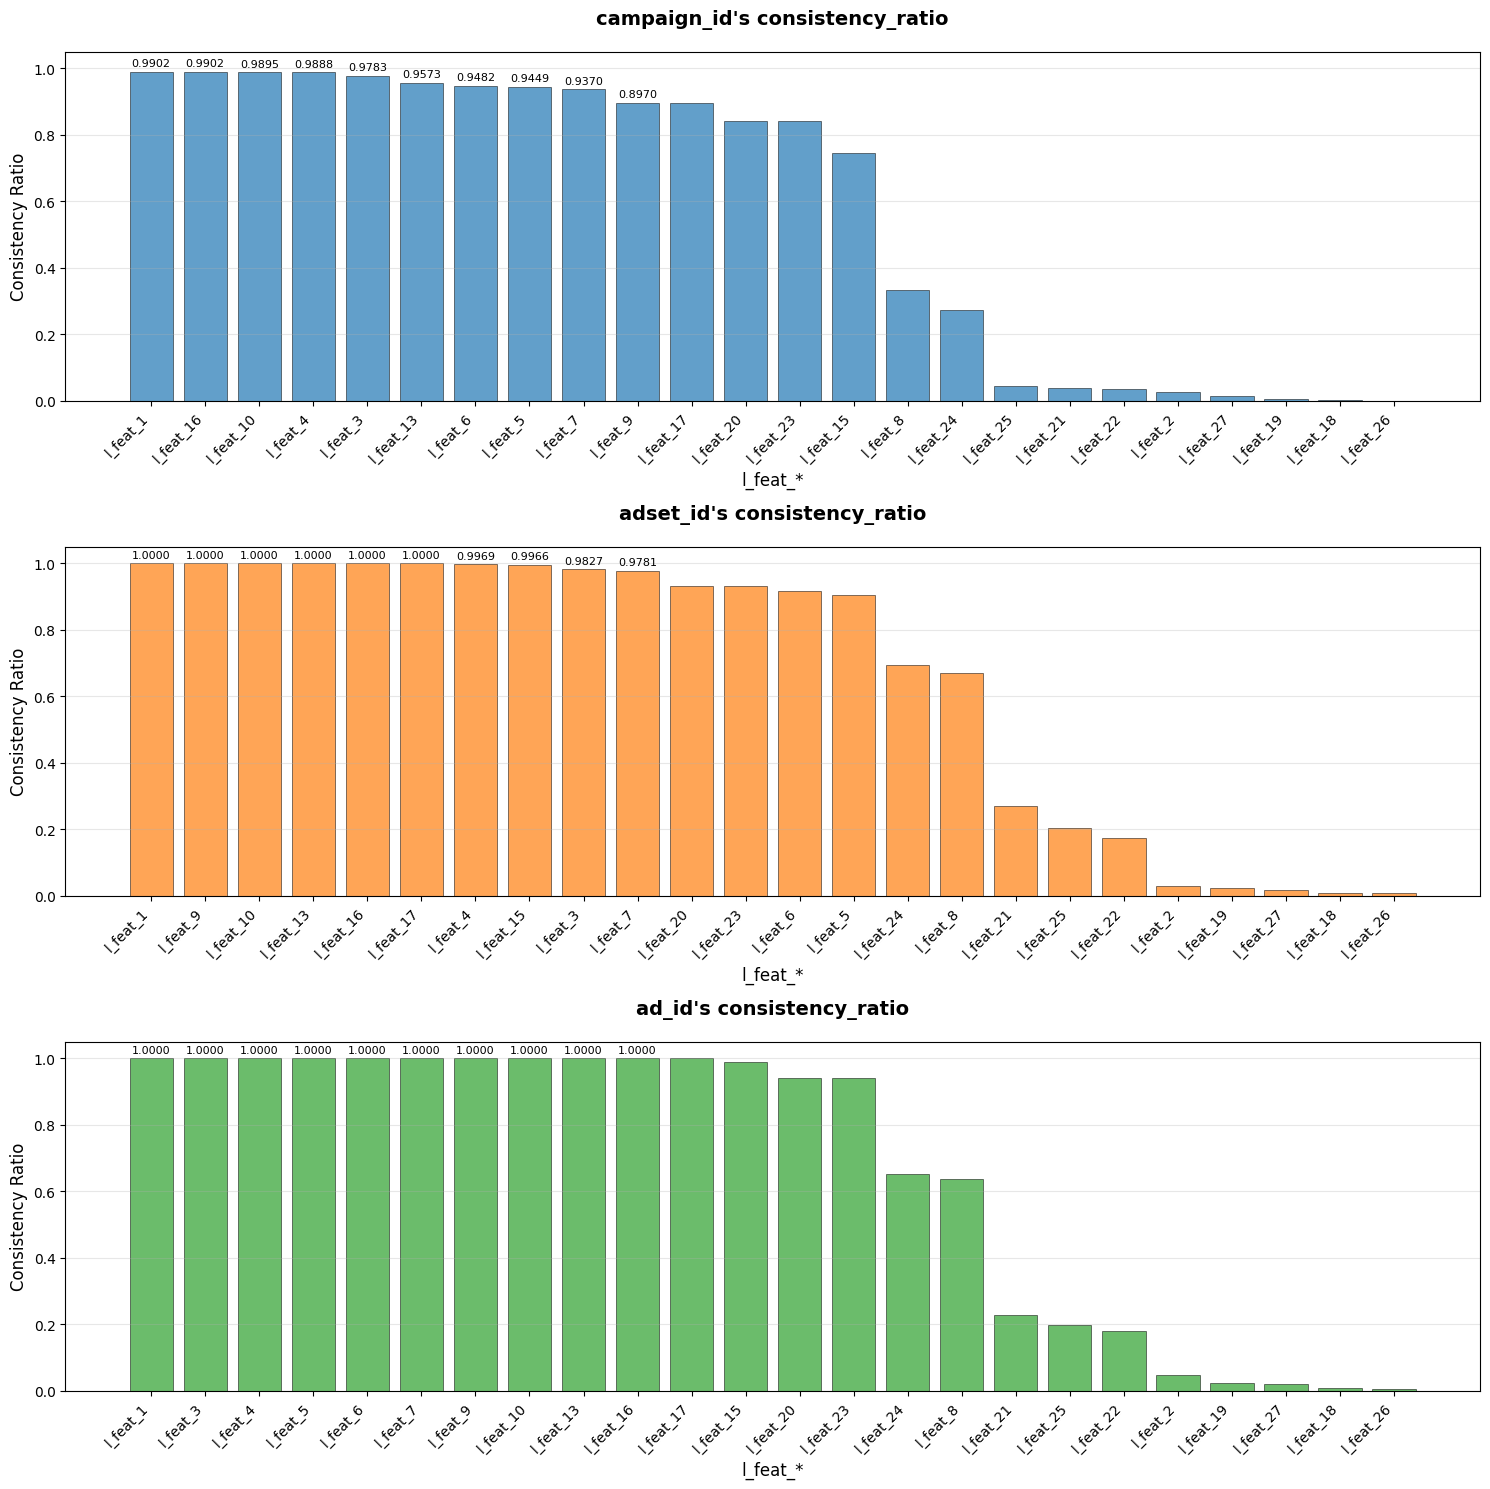


📊 일관성 비율 요약
shape: (3, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ ID_Level   ┆ Total_Feat ┆ Mean_Ratio ┆ Max_Ratio ┆ Min_Ratio ┆ Std_Ratio ┆ High_Cons ┆ Low_Consi │
│ ---        ┆ ures       ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ istency_C ┆ stency_Co │
│ str        ┆ ---        ┆ f64        ┆ f64       ┆ f64       ┆ f64       ┆ ount      ┆ unt       │
│            ┆ i64        ┆            ┆           ┆           ┆           ┆ ---       ┆ ---       │
│            ┆            ┆            ┆           ┆           ┆           ┆ i64       ┆ i64       │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ campaign_i ┆ 24         ┆ 0.57155    ┆ 0.990157  ┆ 0.000656  ┆ 0.436873  ┆ 13        ┆ 8         │
│ d          ┆            ┆            ┆           ┆           ┆           ┆           ┆           │
│ adset_id   ┆ 24         ┆ 0.655365   ┆ 1.0       ┆ 0.006796  ┆

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_consistency_ratios(check_group_result):
    """각 identified_ids별로 rest_l_feat 간의 consistency_ratio를 시각화"""
    
    # 한글 폰트 설정
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['axes.unicode_minus'] = False
    
    # subplot 설정
    n_ids = len(check_group_result)
    fig, axes = plt.subplots(n_ids, 1, figsize=(15, 5*n_ids))
    if n_ids == 1:
        axes = [axes]
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    for idx, (id_level, df) in enumerate(check_group_result.items()):
        ax = axes[idx]
        
        # 데이터 정렬 (consistency_ratio 내림차순)
        df_sorted = df.sort('consistency_ratio', descending=True)
        
        # 막대 그래프 그리기
        bars = ax.bar(range(len(df_sorted)), 
                     df_sorted['consistency_ratio'], 
                     color=colors[idx % len(colors)],
                     alpha=0.7,
                     edgecolor='black',
                     linewidth=0.5)
        
        # 축 설정
        ax.set_title(f"{id_level}'s consistency_ratio", fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel('l_feat_*', fontsize=12)
        ax.set_ylabel('Consistency Ratio', fontsize=12)
        
        # x축 레이블 설정
        ax.set_xticks(range(len(df_sorted)))
        ax.set_xticklabels(df_sorted['l_feat'], rotation=45, ha='right')
        
        # y축 범위 설정
        ax.set_ylim(0, 1.05)
        
        # 격자 추가
        ax.grid(True, alpha=0.3, axis='y')
        
        # 값 표시 (상위 10개만)
        for i, bar in enumerate(bars[:10]):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=8)
        
        # 통계 정보 추가
        mean_ratio = df_sorted['consistency_ratio'].mean()
        max_ratio = df_sorted['consistency_ratio'].max()
        min_ratio = df_sorted['consistency_ratio'].min()
        
        # ax.text(0.02, 0.98, 
        #        f'평균: {mean_ratio:.3f}\n최대: {max_ratio:.3f}\n최소: {min_ratio:.3f}',
        #        transform=ax.transAxes, 
        #        verticalalignment='top',
        #        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
        #        fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 요약 테이블 출력
    print("\n📊 일관성 비율 요약")
    print("=" * 80)
    
    summary_data = []
    for id_level, df in check_group_result.items():
        summary_data.append({
            'ID_Level': id_level,
            'Total_Features': len(df),
            'Mean_Ratio': df['consistency_ratio'].mean(),
            'Max_Ratio': df['consistency_ratio'].max(),
            'Min_Ratio': df['consistency_ratio'].min(),
            'Std_Ratio': df['consistency_ratio'].std(),
            'High_Consistency_Count': (df['consistency_ratio'] > 0.8).sum(),
            'Low_Consistency_Count': (df['consistency_ratio'] < 0.2).sum()
        })
    
    summary_df = pl.DataFrame(summary_data)
    print(summary_df)
    
    return summary_df

# 시각화 실행
summary_df = visualize_consistency_ratios(check_group_result)

In [5]:
# check_group_result['campaign_id'] 가 DataFrame 형태라면
campaign_df = check_group_result["campaign_id"]

# consistency_ratio > 0.9 조건 필터링
campaign_filtered = campaign_df.filter(pl.col("consistency_ratio") > 0.99)
campaign_feat = campaign_filtered['l_feat'].to_list()

campaign_filtered

l_feat,total_groups,consistent_groups,consistency_ratio
str,i64,i64,f64
"""l_feat_1""",1524,1509,0.990157
"""l_feat_16""",1524,1509,0.990157


In [6]:
# check_group_result['adset_id'] 가 DataFrame 형태라면
ad_set_df = check_group_result["adset_id"]

# consistency_ratio > 0.9 조건 필터링
ad_set_filtered = ad_set_df.filter(pl.col("consistency_ratio") > 0.99)
ad_set_feat = ad_set_filtered['l_feat'].to_list()
ad_set_filtered


l_feat,total_groups,consistent_groups,consistency_ratio
str,i64,i64,f64
"""l_feat_1""",3237,3237,1.0
"""l_feat_4""",3237,3227,0.996911
"""l_feat_9""",3237,3237,1.0
"""l_feat_10""",3237,3237,1.0
"""l_feat_13""",3237,3237,1.0
"""l_feat_15""",3237,3226,0.996602
"""l_feat_16""",3237,3237,1.0
"""l_feat_17""",3237,3237,1.0


In [7]:
# check_group_result['adset_id'] 가 DataFrame 형태라면
ad_df = check_group_result["ad_id"]

# consistency_ratio > 0.9 조건 필터링
ad_filtered = ad_df.filter(pl.col("consistency_ratio") > 0.99)
ad_feat = ad_filtered['l_feat'].to_list()
ad_filtered


l_feat,total_groups,consistent_groups,consistency_ratio
str,i64,i64,f64
"""l_feat_1""",5050,5050,1.0
"""l_feat_3""",5050,5050,1.0
"""l_feat_4""",5050,5050,1.0
"""l_feat_5""",5050,5050,1.0
"""l_feat_6""",5050,5050,1.0
…,…,…,…
"""l_feat_9""",5050,5050,1.0
"""l_feat_10""",5050,5050,1.0
"""l_feat_13""",5050,5050,1.0


In [9]:
print("campaign_id(feat_l_11)와 같은 피처들")
print(campaign_feat)

print("\nadset_id(feat_l_14)와 같은 피처들")
print(set(ad_set_feat) - set(campaign_feat))

print("\nad_id(feat_l_12)와 같은 피처들")
print(set(ad_feat) - set(ad_set_feat))



campaign_id(feat_l_11)와 같은 피처들
['l_feat_1', 'l_feat_16']

adset_id(feat_l_14)와 같은 피처들
{'l_feat_9', 'l_feat_10', 'l_feat_13', 'l_feat_4', 'l_feat_17', 'l_feat_15'}

ad_id(feat_l_12)와 같은 피처들
{'l_feat_7', 'l_feat_5', 'l_feat_6', 'l_feat_3'}


- 같은 캠페인 내에서 이 피처들의 값이 99% 이상의 그룹에서 동일 
  -> 'l_feat_1', 'l_feat_16'

- 같은 광고세트 내에서 이 피처들의 값이 99% 이상의 그룹에서 동일 
  -> 'l_feat_4', 'l_feat_13', 'l_feat_17', 'l_feat_10', 'l_feat_15', 'l_feat_9'

- 같은 광고소재 내에서 이 피처들의 값이 99% 이상의 그룹에서 동일
  -> 'l_feat_5', 'l_feat_7', 'l_feat_3', 'l_feat_6'


-> 캠페인/광고세트/광고소재 별로 고정된 값


### Consistency Ratio 해석 기준

| Consistency Ratio | 해석 | 의미 |
|-------------------|------|------|
| **1 ** | 완전 일치 | 해당 ID 그룹별로 완전 일치한 값 |
| **0.99 이상** | 매우 높은 일관성 | 해당 ID 그룹별로 거의 고정된 값 |
| **0.8~0.99** | 높은 일관성 | 해당 ID 그룹별로 대부분 고정된 값 |
| **0.5~0.8** | 중간 일관성 | 해당 ID 그룹별로 어느 정도 관련성 |
| **0.5 미만** | 낮은 일관성 | 해당 ID 그룹과 독립적 |


### 계층 구조와의 연관성

```
캠페인 (l_feat_11)
├── 광고세트 (l_feat_14)
│   ├── 광고소재 (l_feat_12)
│   └── 광고세트별 고정값: l_feat_4, l_feat_13, l_feat_17, l_feat_10, l_feat_15, l_feat_9
├── 광고소재별 고정값: l_feat_5, l_feat_7, l_feat_3, l_feat_6
└── 캠페인별 고정값: l_feat_1, l_feat_16
```

###  Drop 근거

#### **높은 일관성 피처들의 특징:**
1. **ID 기반 파생 변수**: 특정 ID 그룹에 속한 모든 레코드가 동일한 값을 가짐
2. **정보 중복**: ID만으로도 충분히 설명 가능한 정보 -> 과적합 유발 가능성 있음
3. **일반화 불가능**: 새로운 ID가 등장하면 예측 불가능